In [9]:
from transformers import AutoImageProcessor, SuperPointForKeypointDetection
import torch
from PIL import Image
import requests

imp_path = "lena.png"
image = Image.open(imp_path)

processor = AutoImageProcessor.from_pretrained("magic-leap-community/superpoint")
model = SuperPointForKeypointDetection.from_pretrained("magic-leap-community/superpoint")

inputs = processor(image, return_tensors="pt")
output = model(**inputs)

In [12]:
image_sizes = image.size[::-1]  # (height, width)
print("Image size (H, W):", image_sizes)
outputs = processor.post_process_keypoint_detection(output, [image_sizes])

Image size (H, W): (512, 512)


In [13]:
print("Keypoints shape:", output["keypoints"])

Keypoints shape: tensor([[[0.6484, 0.0375],
         [0.6500, 0.0479],
         [0.4359, 0.0854],
         [0.4437, 0.0854],
         [0.4531, 0.0875],
         [0.4625, 0.0896],
         [0.4984, 0.0958],
         [0.0500, 0.0979],
         [0.5063, 0.1000],
         [0.3656, 0.1063],
         [0.1250, 0.1125],
         [0.8875, 0.1146],
         [0.0453, 0.1167],
         [0.5312, 0.1167],
         [0.1250, 0.1229],
         [0.6500, 0.1229],
         [0.3109, 0.1271],
         [0.5688, 0.1417],
         [0.8656, 0.1417],
         [0.5766, 0.1479],
         [0.7172, 0.1500],
         [0.7188, 0.1604],
         [0.2719, 0.1833],
         [0.6047, 0.1854],
         [0.9797, 0.1917],
         [0.2609, 0.1958],
         [0.6219, 0.1979],
         [0.4453, 0.2000],
         [0.2578, 0.2062],
         [0.4922, 0.2146],
         [0.7891, 0.2188],
         [0.7656, 0.2208],
         [0.8125, 0.2208],
         [0.5609, 0.2229],
         [0.1656, 0.2250],
         [0.3594, 0.2333],
         [0

In [14]:
print("size of keypoint:%d size of scores:%d"%(len(output["keypoints"]),len(output["scores"])))

size of keypoint:1 size of scores:1


In [15]:
print("Keypoints shape:", output["scores"])

Keypoints shape: tensor([[0.0882, 0.0099, 0.0587, 0.0072, 0.0101, 0.0133, 0.0070, 0.0150, 0.0108,
         0.0073, 0.0065, 0.1452, 0.0979, 0.0069, 0.0060, 0.0066, 0.1253, 0.0091,
         0.1875, 0.1649, 0.0744, 0.0089, 0.0134, 0.1656, 0.0363, 0.0225, 0.0861,
         0.0179, 0.0992, 0.0336, 0.0781, 0.1253, 0.1646, 0.0634, 0.0097, 0.0132,
         0.1125, 0.0062, 0.0116, 0.1527, 0.0150, 0.0746, 0.0116, 0.0708, 0.0838,
         0.0082, 0.0119, 0.0074, 0.0801, 0.0191, 0.0061, 0.3070, 0.0485, 0.0084,
         0.3447, 0.0306, 0.0076, 0.1705, 0.0098, 0.1929, 0.0078, 0.0640, 0.3484,
         0.0052, 0.2150, 0.0436, 0.0636, 0.0068, 0.0526, 0.0053, 0.0073, 0.0058,
         0.0053, 0.0184, 0.0864, 0.0404, 0.0054, 0.1190, 0.3053, 0.2048, 0.0063,
         0.0493, 0.0073, 0.0403, 0.2163, 0.0062, 0.0465, 0.3260, 0.1086, 0.0470,
         0.0602, 0.0990, 0.3046, 0.0317, 0.0151, 0.0245, 0.0055, 0.2998, 0.0066,
         0.0783, 0.0939, 0.1265, 0.0070, 0.0256, 0.0201, 0.3822, 0.0112, 0.3647,
         0.

C:\Users\Sherin\AppData\Local\Temp\ipykernel_14436\309630488.py:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x_tensor = torch.tensor(keypoints[:, 0], requires_grad=True)
C:\Users\Sherin\AppData\Local\Temp\ipykernel_14436\309630488.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_tensor = torch.tensor(keypoints[:, 1], requires_grad=True)


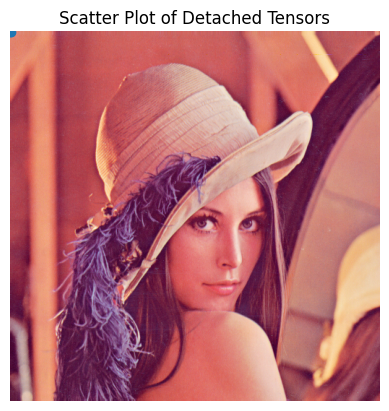

In [19]:
import matplotlib.pyplot as plt
import torch

keypoints = output["keypoints"]
scores = output["scores"]
descriptors = output["descriptors"]

x_tensor = torch.tensor(keypoints[:, 0], requires_grad=True)
y_tensor = torch.tensor(keypoints[:, 1], requires_grad=True)


plt.axis("off")
plt.imshow(image)
plt.scatter(x_tensor.detach().numpy(), y_tensor.detach().numpy())
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Scatter Plot of Detached Tensors")
#plt.show()

plt.savefig(f"output_image.png")

In [20]:
print("Keypoints shape:", x_tensor)

Keypoints shape: tensor([[0.6484, 0.0375]], requires_grad=True)
